In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
%matplotlib inline
df = pd.read_csv('movie_metadata.csv')


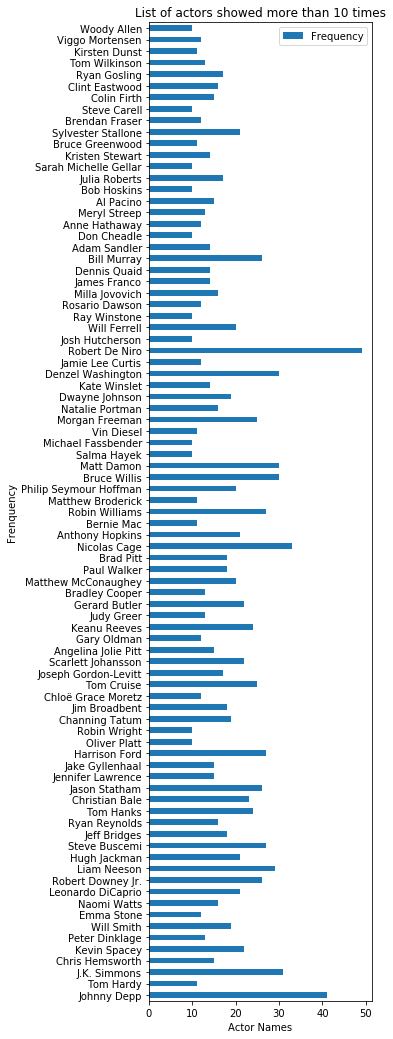

In [11]:
actor_1_counts = Counter(df['actor_1_name'])
result = pd.DataFrame.from_dict(actor_1_counts, orient='index')
popular = {}
min_occus_act = 10
for key, value in actor_1_counts.items():
    if value >=min_occus_act:
        popular[key] = value
rank = Counter(popular)
rank_result = pd.DataFrame.from_dict(rank, orient='index')
rank_result.plot(kind='barh',figsize=(4, 18))
plt.xlabel('Actor Names')
plt.ylabel('Frenquency')
plt.title('List of actors showed more than ' + str(min_occus_act) + ' times')
plt.legend(['Frequency'])
plt.show()

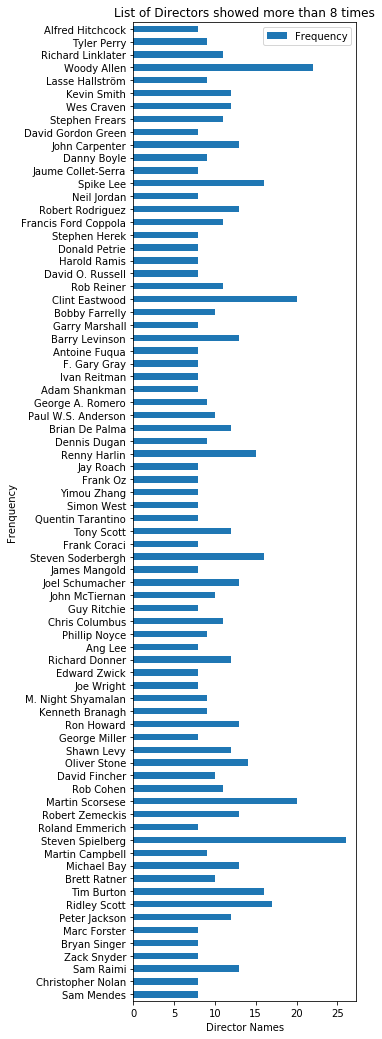

In [169]:

director_counts = Counter(df['director_name'].dropna())
result = pd.DataFrame.from_dict(director_counts, orient='index')
popular = {}
min_occus_dir = 8
for key, value in director_counts.items():
    if value >=min_occus_dir:
        popular[key] = value
rank = Counter(popular)
rank_result = pd.DataFrame.from_dict(rank, orient='index')
rank_result.plot(kind='barh',figsize=(4,18))
plt.xlabel('Director Names')
plt.ylabel('Frenquency')
plt.title('List of Directors showed more than '+ str(min_occus_dir) + ' times')
plt.legend(['Frequency'])
plt.show()

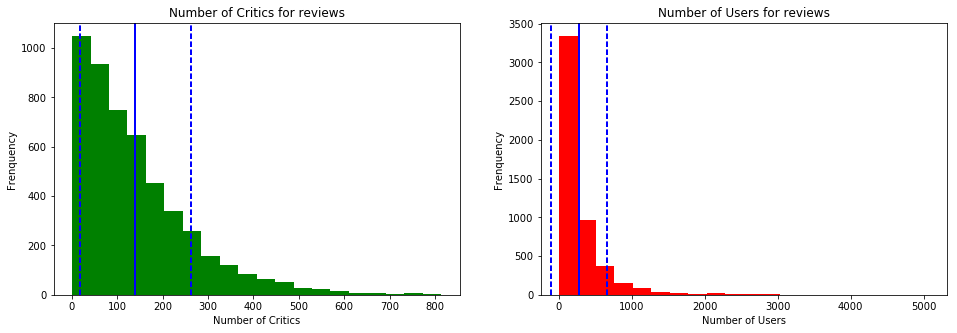

In [22]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
plt.hist(df['num_critic_for_reviews'].dropna(), bins=20, color='green')
plt.axvline(df['num_critic_for_reviews'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['num_critic_for_reviews'].mean() + df['num_critic_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['num_critic_for_reviews'].mean()-df['num_critic_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Number of Critics')
plt.ylabel('Frenquency')
plt.title('Number of Critics for reviews')

plt.subplot(1, 2, 2)
plt.hist(df['num_user_for_reviews'].dropna(), bins=20, color='red')
plt.axvline(df['num_user_for_reviews'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['num_user_for_reviews'].mean() + df['num_user_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['num_user_for_reviews'].mean()-df['num_user_for_reviews'].std(), color='b', linestyle='dashed', linewidth=2) 
plt.xlabel('Number of Users')
plt.ylabel('Frenquency')
plt.title('Number of Users for reviews')
plt.show()

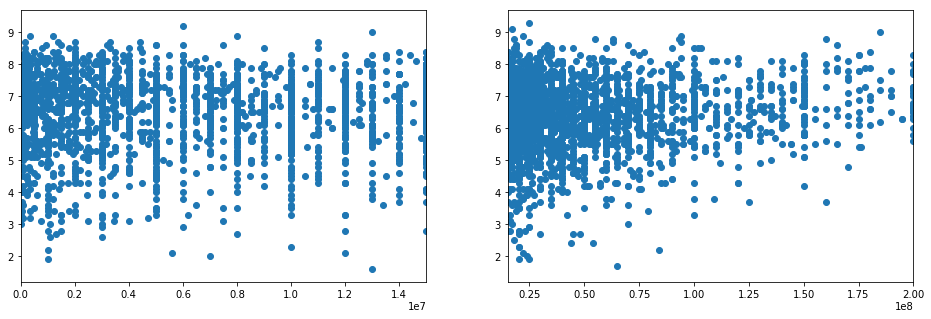

In [21]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
bud_imdb = df[['budget', 'imdb_score']].copy()
bud_imdb = bud_imdb[np.isfinite(df['budget'])]
plt.scatter(x = bud_imdb['budget'], y = bud_imdb['imdb_score'])
plt.xlim(0, 15000000)


plt.subplot(1, 2, 2)
bud_imdb = df[['budget', 'imdb_score']].copy()
bud_imdb = bud_imdb[np.isfinite(df['budget'])]
plt.scatter(x = bud_imdb['budget'], y = bud_imdb['imdb_score'])
plt.xlim(15000000, 200000000)
plt.show()

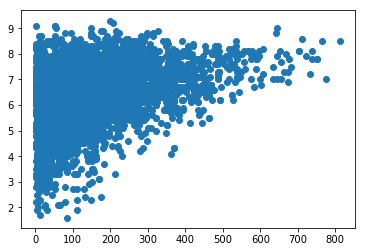

In [4]:
crit_imdb = df[['num_critic_for_reviews', 'imdb_score']].copy()
crit_imdb = crit_imdb[np.isfinite(df['num_critic_for_reviews'])]
plt.scatter(x = crit_imdb['num_critic_for_reviews'], y = crit_imdb['imdb_score'])
plt.show()

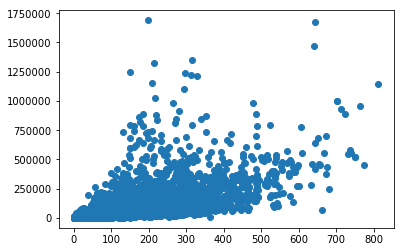

In [5]:
crit_numvoted = df[['num_critic_for_reviews', 'num_voted_users']].copy()
crit_numvoted = crit_numvoted[np.isfinite(df['num_critic_for_reviews'])]
plt.scatter(x = crit_numvoted['num_critic_for_reviews'], y = crit_numvoted['num_voted_users'])
plt.show()

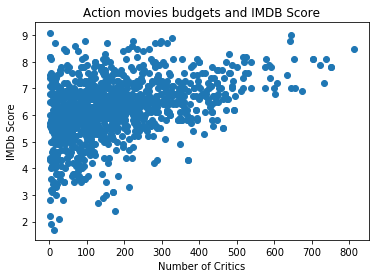

In [8]:
movie_type = 'Action'
act_crit = df[df['genres'].str.contains(movie_type)]
act_crit_imdb = act_crit[['num_critic_for_reviews', 'imdb_score']].copy()
act_crit_imdb = act_crit_imdb[np.isfinite(act_crit['num_critic_for_reviews'])]
plt.scatter(x = act_crit_imdb['num_critic_for_reviews'], y = act_crit_imdb['imdb_score'])
plt.xlabel('Number of Critics')
plt.ylabel('IMDb Score')
plt.title(movie_type +' movies budgets and IMDB Score')
plt.show()


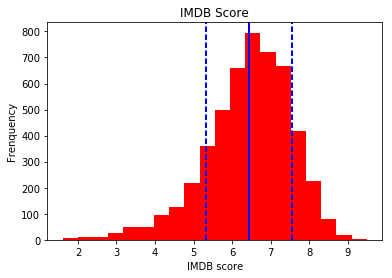

In [14]:
plt.hist(df['imdb_score'].dropna(), bins=20, color='red')
plt.axvline(df['imdb_score'].mean(), color='b', linestyle='solid', linewidth=2)
plt.axvline(df['imdb_score'].mean() + df['imdb_score'].std(), color='b', linestyle='dashed', linewidth=2)
plt.axvline(df['imdb_score'].mean()-df['imdb_score'].std(), color='b', linestyle='dashed', linewidth=2) 

plt.xlabel('IMDB score')
plt.ylabel('Frenquency')
plt.title('IMDB Score')

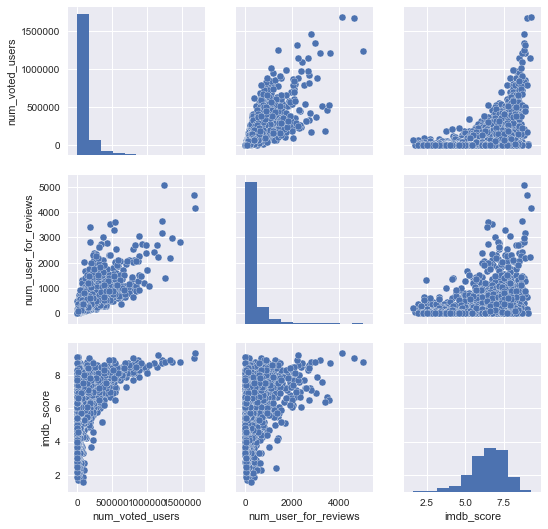

In [28]:
sns.pairplot(df[['num_voted_users','num_user_for_reviews','imdb_score']].dropna())